<a href="https://colab.research.google.com/github/eportah/Bird-of-Prey-Identifier/blob/main/swapNormMobnetv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#setup dataset

#mount the drive to retrieve dataset
from google.colab import drive
drive.mount('/content/drive')

#import ZipFile to read dataset
from zipfile import ZipFile

#establish paths
zipPath = "/content/drive/MyDrive/MachineLearning/Datasets/birdsDatasets.zip"
extractPath = "/content/extractPath"

#extract and open dataset in read mode using ZipFile
with ZipFile(zipPath, 'r') as zipObj:
   zipObj.extractall(extractPath)

Mounted at /content/drive


In [2]:
#load dataset

#cell output rundown
"""
- Dataset has 300 files (images) split into 2 classes.
- Class names are 'birdsOfPrey' and 'notBirdsOfPrey'.
- Images are batched into groups of 32, resized to 224x224 pixels, with 3 color channels RGB.
- Labels are stored in 1-D array of length 32, one label per image in the batch.
"""

#store dataset path into variable and import tensorflow to load images from directory
datasetDirectory = "/content/extractPath/birdsDataset"
import tensorflow as tf

#load dataset with function image_dataset_from_directory and establish both image size and batch size
trainDataset = tf.keras.utils.image_dataset_from_directory(datasetDirectory, image_size=(224,224), batch_size=32)

#preview what got loaded and what dataset looks like
class_names = trainDataset.class_names
print("Class names:", class_names)
for images, labels in trainDataset.take(1):
  print("Image batch shape:", images.shape)
  print("Label batch shape:", labels.shape)

Found 300 files belonging to 2 classes.
Class names: ['birdsOfPrey', 'notBirdsOfPrey']
Image batch shape: (32, 224, 224, 3)
Label batch shape: (32,)


In [3]:
#split dataset

#cell output rundown
"""
- 210, 70% for training
- 90, 30% for validation
- Batch sizes are the same for both training and validation
"""

#load training dataset, 70% of data
trainingDataset = tf.keras.utils.image_dataset_from_directory(
   datasetDirectory,
   validation_split=0.3,
   subset="training",
   seed=123,
   image_size=(224,224),
   batch_size=32
)

#load validation dataset, 30% of data
validationDataset = tf.keras.utils.image_dataset_from_directory(
   datasetDirectory,
   validation_split=0.3,
   subset="validation",
   seed=123,
   image_size=(224,224),
   batch_size=32
)

#preview one batch from training dataset
print("Training batch shapes:")
for imagesTrain, labelsTrain in trainingDataset.take(1):
  print("Images:", imagesTrain.shape)
  print("Labels:", labelsTrain.shape)

#preview one batch from validation dataset
print("Validation batch shapes:")
for imagesVal, labelsVal in validationDataset.take(1):
 print("Images:", imagesVal.shape)
 print("Labels:", labelsVal.shape)

Found 300 files belonging to 2 classes.
Using 210 files for training.
Found 300 files belonging to 2 classes.
Using 90 files for validation.
Training batch shapes:
Images: (32, 224, 224, 3)
Labels: (32,)
Validation batch shapes:
Images: (32, 224, 224, 3)
Labels: (32,)


In [4]:
#preprocess dataset

#import MobileNetV2 preprocessing
from keras.applications.mobilenet_v2 import preprocess_input

#define dataAugmentation
dataAugmentation = tf.keras.Sequential([
   tf.keras.layers.RandomFlip("horizontal"),
   tf.keras.layers.RandomRotation(0.1),
   tf.keras.layers.RandomZoom(0.1)
])

#apply augmentation and MobileNetV2 preprocessing to training set using map to transform batches of images
trainSet = trainingDataset.map(lambda x, y: (preprocess_input(dataAugmentation(x)),y))

#apply MobileNetV2 preprocessing to validation set still using map to transform batches of images
validSet = validationDataset.map(lambda x, y: (preprocess_input(x),y))

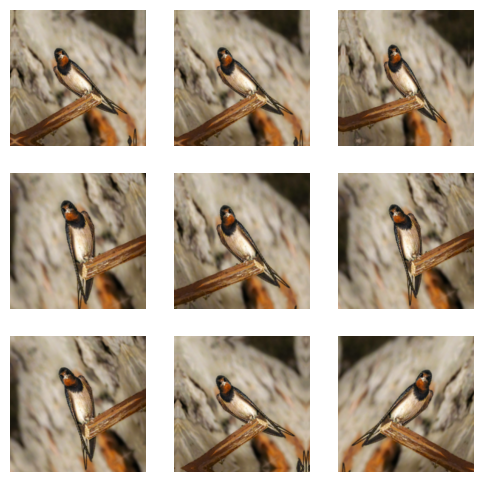

In [5]:
#preview augmentation

#import pyplot to visualize tensors as images and numpy for numpy indexing
import matplotlib.pyplot as plt
import numpy as np

#take one raw image from unmapped training dataset and select first image and its label, shape (224, 224, 3)
for imgs, labs in trainingDataset.take(1):
  batchImages = imgs.numpy()
  batchLabels = labs.numpy()
sampleImage = batchImages[0]
sampleLabel = batchLabels[0]

#establish grid and create a figure for plotting
augmentedNum = 9
plt.figure(figsize = (6,6))

#add batch dimension and apply augmentation
for i in range(augmentedNum):
  imgBatch = np.expand_dims(sampleImage, axis = 0)
  imgAugmented = dataAugmentation(imgBatch)[0].numpy()

  #clip to ensure values are within range and cast to convert the aray from floats to 8-bit unsigned integers
  imgAugmented = np.clip(imgAugmented, 0, 255).astype("uint8")

  #finish off by plotting each augmented image in a 3x3 grid
  axes = plt.subplot(3,3, i+1)
  axes.imshow(imgAugmented)
  axes.axis('off')